# Modelling: Linear Regression Berlin rent

In [1]:
#import numba.core.bytecode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Setting up the model using numerical features alone

In [2]:
df = pd.read_csv("df_numeric.csv")
pd.set_option("display.max_columns", None)

In [3]:
df.tail()

,total rent,area,number of rooms,balcony,built-in kitchen,basement,garden,elevator,stepless,guest toilet,flat share possible,district_alt-hohenschönhausen,district_alt-treptow,district_altglienicke,district_baumschulenweg,district_biesdorf,district_blankenburg,district_bohnsdorf,district_borsigwalde,district_britz,district_buch,district_buckow,district_charlottenburg,district_charlottenburg-nord,district_dahlem,district_falkenberg,district_falkenhagener feld,district_fennpfuhl,district_französisch buchholz,district_friedenau,district_friedrichsfelde,district_friedrichshagen,district_friedrichshain,district_gatow,district_gesundbrunnen,district_gropiusstadt,district_grunewald,district_grünau,district_hakenfelde,district_halensee,district_hansaviertel,district_haselhorst,district_heiligensee,district_heinersdorf,district_hellersdorf,district_hermsdorf,district_johannisthal,district_karlshorst,district_karow,district_kaulsdorf,district_konradshöhe,district_kreuzberg,district_köpenick,district_lankwitz,district_lichtenberg,district_lichtenrade,district_lichterfelde,district_lübars,district_mahlsdorf,district_mariendorf,district_marienfelde,district_marzahn,district_mitte,district_moabit,district_märkisches viertel,district_müggelheim,district_neu-hohenschönhausen,district_neukölln,district_niederschöneweide,district_niederschönhausen,district_nikolassee,district_oberschöneweide,district_pankow,district_plänterwald,district_prenzlauer berg,district_rahnsdorf,district_reinickendorf,district_rosenthal,district_rummelsburg,district_schmargendorf,district_schmöckwitz,district_schöneberg,district_siemensstadt,district_spandau,district_staaken,district_steglitz,district_tegel,district_tempelhof,district_tiergarten,district_wannsee,district_wedding,district_weißensee,district_westend,district_wilhelmsruh,district_wilhelmstadt,district_wilmersdorf,district_wittenau,district_zehlendorf,landlord_degewo,landlord_estate agent,landlord_housinganywhere b.v.,landlord_howoge,landlord_numa group,landlord_private offer,landlord_tauschwohnung wohnungstausch,landlord_visionapartments,landlord_wohnungsswap.de
3330,1035.0,80.00,3.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3331,1663.0,84.10,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3332,1260.0,72.00,2.5,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3333,2995.0,158.00,4.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3334,1999.0,136.32,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Dropping columns with low number of occurences

In [4]:
df = df.drop(columns=["guest toilet", "flat share possible", "stepless", "garden"])

In [5]:
df = df[["total rent","area","number of rooms"]]

#### Doing X-y split (y is the target variable total rent)

In [6]:
y = df["total rent"]

In [7]:
X = df.drop(columns=["total rent"])
X

,area,number of rooms
0,175.00,3.0
1,147.00,4.0
2,72.86,3.0
3,107.89,1.0
4,93.36,3.0
...,...,...
3330,80.00,3.0
3331,84.10,2.0
3332,72.00,2.5
3333,158.00,4.0


#### Train/ Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state= 42)

#### Standardizing the data using a scaler

In [9]:
# fit and transform for tain data
# only transform for test data
transformer = StandardScaler()
X_train = transformer.fit_transform(X_train)
X_test  = transformer.transform(X_test)

#### Apply linear regression model

In [10]:
model = LinearRegression()   # model is y = SUM(slopes*Xs) + intercept
model.fit(X_train, y_train) # compute for me the coefficients (slopes and intercept)
y_pred_test = model.predict(X_test)   # model prediction [test]
y_pred_train = model.predict(X_train)  # model prediction [train]

#### Explanatory power of model

In [11]:
R2=r2_score(y_test,y_pred_test)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("the performance scores are r2={:3f} and r2_adj={:3f}".format(R2,Adj_R2))
# Adjusted R²:  R² which takes into account the number of independent features used by the model
# while adding a new feature (another x-variable as input) always increases R²  
# Adjusted R² only increases if the inclusion improves the model’s performance

the performance scores are r2=0.283732 and r2_adj=0.281574


In [12]:
R2_train=r2_score(y_train,y_pred_train)
R2_train

0.3066198704747325

#### Model interpretation

<AxesSubplot: xlabel='total rent'>

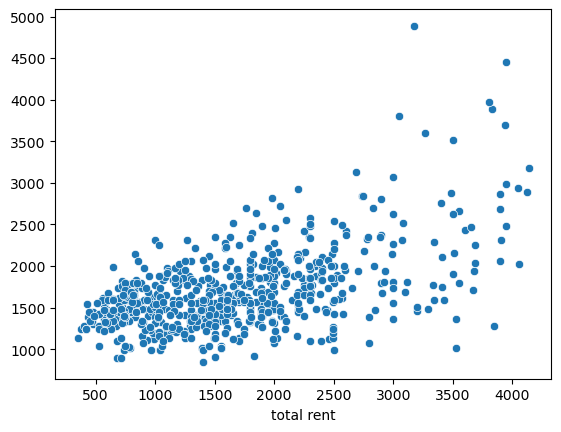

In [13]:
import seaborn as sns
%matplotlib inline
sns.scatterplot(x=y_test, y=y_pred_test)

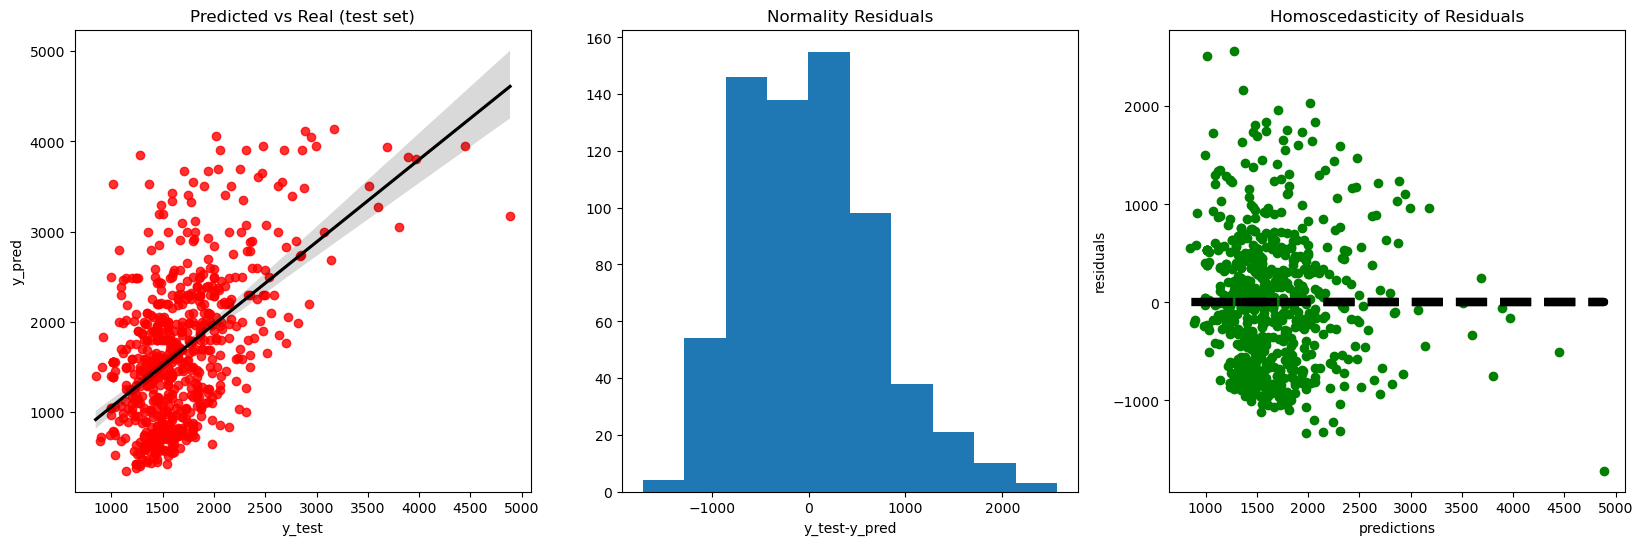

In [14]:
fig, ax = plt.subplots(1,3,figsize=(20,6))

# forms a line?
sns.regplot(x='y_pred_test',y='y_test', data=pd.DataFrame({"y_test": y_test, "y_pred_test": y_pred_test}) ,
            scatter_kws={"color": "red"}, line_kws={"color": "black"}, ax=ax[0])
#ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Predicted vs Real (test set)")

# normal distribution?
ax[1].hist(y_test - y_pred_test)
ax[1].set_xlabel("y_test-y_pred")
ax[1].set_title("Normality Residuals")

# constant?
ax[2].plot(y_pred_test,y_test - y_pred_test,"o",color='green')
ax[2].set_xlabel("predictions")
ax[2].set_ylabel("residuals")
ax[2].set_title("Homoscedasticity of Residuals")
ax[2].plot(y_pred_test,np.zeros(len(y_pred_test)),linestyle='dashed',linewidth=6,color='black')

# homoscedasticity: the differences between the predicted values and the actual values is constant 
#and does not depend on the predicted value
# on the other hand, if a data set does not exhibit homoscedasticity, the scatter plot will show a pattern 
#where the variability of the dependent variable increases or decreases as the value of the independent variable increases or decreases


In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [16]:
X_train_const = sm.add_constant(X_train) # adding a constant
X_test_const  = sm.add_constant(X_test) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()

predictions_train = model.predict(X_train_const)
predictions_test  = model.predict(X_test_const)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             total rent   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     589.2
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          1.24e-212
Time:                        14:23:47   Log-Likelihood:                -21200.
No. Observations:                2668   AIC:                         4.241e+04
Df Residuals:                    2665   BIC:                         4.242e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1685.1312     13.240    127.273      0.0